# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [2]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [3]:
load_dotenv(find_dotenv())

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [5]:
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [6]:
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [7]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [10]:
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18919068,
            "id": 1,
            "last_updated": 1641240171,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 883139665360,
                    "percent_change_1h": -0.184914157811041,
                    "percent_change_24h": -1.10573983353295,
                    "percent_change_7d": -8.63385921501674,
                    "percentage_change_1h": -0.184914157811041,
                    "percentage_change_24h": -1.10573983353295,
                    "percentage_change_7d": -8.63385921501674,
                    "price": 46462.0,
                    "volume_24h": 35291384997
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18919068,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [11]:
eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119011051,
            "id": 1027,
            "last_updated": 1641240112,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 448718099421,
                    "percent_change_1h": -0.203512487775289,
                    "percent_change_24h": -1.26062798647118,
                    "percent_change_7d": -7.92855842149025,
                    "percentage_change_1h": -0.203512487775289,
                    "percentage_change_24h": -1.26062798647118,
                    "percentage_change_7d": -7.92855842149025,
                    "price": 3751.94,
                    "volume_24h": 15727120725
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119011051,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [12]:
btc_price = btc_response['data']['1']['quotes']['USD']['price']
print(f"BTC Current Price: ${btc_price:,.2f}")

BTC Current Price: $46,462.00


In [13]:
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
print(f"ETH Current Price: ${eth_price:,.2f}")

ETH Current Price: $3,751.94


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [14]:
btc_value = btc_coins * btc_price
print(f"Current price of BTC Holding: ${btc_value:,.2f}")

Current price of BTC Holding: $55,754.40


In [15]:
eth_value = eth_coins * eth_price
print(f"Current price of ETH Holding: ${eth_value:,.2f}")

Current price of ETH Holding: $19,885.28


In [16]:
total_crypto_wallet = btc_value + eth_value
print(f"Current Cryptocurrency Wallet Balance: ${total_crypto_wallet:,.2f}")

Current Cryptocurrency Wallet Balance: $75,639.68


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [17]:
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [19]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [21]:
tickers = ['SPY', 'AGG']
timeframe= '1D'
start_date = pd.Timestamp('2021-12-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-31', tz='America/New_York').isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [22]:
stock_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

stock_prices_df.index = stock_prices_df.index.date
stock_prices_df

AGG                                      SPY                  \
              open    high     low   close   volume    open    high     low   
2021-12-31  114.15  114.31  114.06  114.09  6557778  475.64  476.86  474.67   

                              
             close    volume  
2021-12-31  474.89  51212452

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [25]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = stock_prices_df['AGG']['close'][0]

# Print the AGG closing price
print(f"AGG Closing Price for 2021-12-31: ${agg_close_price:,.2f}")

AGG Closing Price for 2021-12-31: $114.09


In [26]:
spy_close_price = stock_prices_df['SPY']['close'][0]
print(f"SPY Closing Price for 2021-12-31: ${spy_close_price:,.2f}")

SPY Closing Price for 2021-12-31: $474.89


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [27]:
agg_value = agg_close_price * agg_shares
print(f"Bond Portfolio Value: ${agg_value:,.2f}")

Bond Portfolio Value: $22,818.00


In [28]:
spy_value = spy_close_price * spy_shares
print(f"Stock Portfolio Value: ${spy_value:,.2f}")

Stock Portfolio Value: $52,237.90


In [29]:
total_stocks_bonds = agg_value + spy_value
print(f"Current Combined Stock & Bond Portfolio Value: ${total_stocks_bonds:,.2f}")

Current Combined Stock & Bond Portfolio Value: $75,055.90


In [30]:
total_portfolio = total_crypto_wallet + total_stocks_bonds
print(f"Current Total of all Security Assets: ${total_portfolio:,.2f}")

Current Total of all Security Assets: $150,695.58


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [31]:
savings_data = [total_crypto_wallet, total_stocks_bonds]

savings_data

[75639.682, 75055.9]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [32]:
savings_df = pd.DataFrame(
    savings_data,
    columns=['amount'],
    index=['crypto', 'stock/bond']
)

savings_df

,amount
crypto,75639.682
stock/bond,75055.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

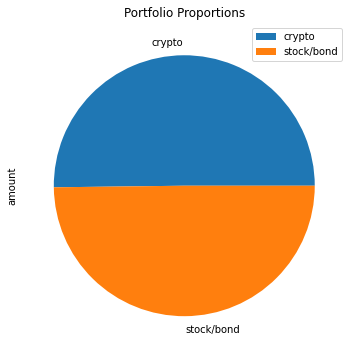

In [33]:
savings_df.plot.pie(
    y='amount',
    figsize=(6, 6),
    title='Portfolio Proportions'
);

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [34]:
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [35]:
if total_portfolio > emergency_fund_value:
    print("Congratulations, your crypto/stock/bond "
          "portfolio has the funds to finance your emergency portfolio!")
elif total_portfolio == emergency_fund_value:
    print("Congratulations, your crypto/stock/bond portfolio equals the amount of funds needed to finance your emergency portfolio.")
else:
    print(f"Your crypto/stock/bond portfolio is currently valued at ${total_portfolio:,.2f}. To finance your "
          f"emergency portfolio, an additional ${emergency_fund_value - total_portfolio:,.2f} will be needed.")

Congratulations, your crypto/stock/bond portfolio has the funds to finance your emergency portfolio!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [36]:
start_date = pd.Timestamp('2018-12-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-31', tz='America/New_York').isoformat()
limit_rows = 1000

In [37]:
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

prices_df.index = prices_df.index.date

display(prices_df.head())
display(prices_df.tail())
prices_df.shape

AGG                                           SPY          \
              open     high       low    close    volume    open    high   
2018-12-31  106.12  106.510  105.6200  106.495   8349838  249.56  250.16   
2019-01-02  106.55  106.610  106.4701  106.585  10164756  245.98  251.21   
2019-01-03  106.57  107.075  106.5700  107.020   6260265  248.23  248.57   
2019-01-04  106.66  106.720  106.5500  106.695   7755476  247.59  253.11   
2019-01-07  106.72  106.790  106.4600  106.470   6545877  252.69  255.95   

                                       
               low   close     volume  
2018-12-31  247.47  248.55  100767777  
2019-01-02  245.95  249.89  107236613  
2019-01-03  244.03  244.46  113782919  
2019-01-04  247.17  252.41  122528832  
2019-01-07  251.69  254.40   88317608

AGG                                      SPY                  \
              open    high     low   close   volume    open    high     low   
2021-12-27  114.15  114.30  114.13  114.27  5069840  472.03  477.31  472.01   
2021-12-28  114.43  114.45  114.17  114.22  4892072  477.72  478.81  476.06   
2021-12-29  113.99  114.05  113.81  113.87  5712959  477.00  478.56  475.92   
2021-12-30  113.99  114.13  113.83  114.12  5044053  477.93  479.00  475.67   
2021-12-31  114.15  114.31  114.06  114.09  6557778  475.64  476.86  474.67   

                              
             close    volume  
2021-12-27  477.27  46260198  
2021-12-28  476.89  37370466  
2021-12-29  477.46  47223213  
2021-12-30  476.15  44681636  
2021-12-31  474.89  51212452

(758, 10)

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [38]:
Monte_Carlo_30 = MCSimulation(
    portfolio_data=prices_df,
    weights=[0.4, 0.6],
    num_simulation=500,
    num_trading_days=252*30
)

Monte_Carlo_30.portfolio_data.head()

AGG                                                        SPY  \
              open     high       low    close    volume daily_return    open   
2018-12-31  106.12  106.510  105.6200  106.495   8349838          NaN  249.56   
2019-01-02  106.55  106.610  106.4701  106.585  10164756     0.000845  245.98   
2019-01-03  106.57  107.075  106.5700  107.020   6260265     0.004081  248.23   
2019-01-04  106.66  106.720  106.5500  106.695   7755476    -0.003037  247.59   
2019-01-07  106.72  106.790  106.4600  106.470   6545877    -0.002109  252.69   

                                                            
              high     low   close     volume daily_return  
2018-12-31  250.16  247.47  248.55  100767777          NaN  
2019-01-02  251.21  245.95  249.89  107236613     0.005391  
2019-01-03  248.57  244.03  244.46  113782919    -0.021730  
2019-01-04  253.11  247.17  252.41  122528832     0.032521  
2019-01-07  255.95  251.69  254.40   88317608     0.007884

In [39]:
Monte_Carlo_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016802,0.989824,1.009140,1.026654,0.996511,0.997768,0.999838,1.003123,1.002266,0.998849,...,1.009978,0.985894,0.989673,1.004149,1.015362,0.998373,0.994645,1.001218,0.990863,1.016292
2,1.021527,0.990383,1.011671,1.021937,0.997485,0.995339,1.011343,1.000898,1.011603,0.998814,...,1.008602,0.990893,0.991999,0.996693,1.005068,0.985263,0.985613,0.998740,1.003211,1.018398
3,1.019314,0.992525,1.027526,1.025858,0.997190,0.986961,1.014576,1.001450,1.016040,1.010072,...,1.014077,0.991159,0.987905,1.001486,1.010149,0.987747,0.982414,1.005621,1.000939,1.023172
4,1.009706,0.998492,1.040162,1.012322,0.998062,0.986032,1.015686,1.000118,1.024389,1.001766,...,1.012065,0.985253,0.990932,1.006484,1.002182,0.979382,0.997767,1.025998,1.009674,1.017475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,66.036571,42.647939,91.122495,88.470999,39.641561,80.475334,52.882270,34.461531,73.292813,176.360318,...,200.063876,13.199696,72.334782,89.491430,298.604723,112.459012,41.823237,226.758514,145.085952,172.090467
7557,65.722999,42.618991,91.260728,87.947988,39.770488,81.567201,53.253980,35.115013,71.259471,174.103376,...,197.999849,13.265597,72.353584,88.295522,300.803007,112.357416,42.154487,227.552237,144.955159,171.698373
7558,66.285127,42.847712,90.705558,88.208113,39.656618,81.837669,52.933338,35.144864,71.362425,174.797751,...,195.877191,13.382300,73.279620,88.111071,301.293678,111.046818,41.976644,229.203505,142.102137,170.629653
7559,67.113448,42.463394,91.371411,88.251643,40.225086,81.230114,52.747802,35.214194,71.782522,178.371847,...,198.097830,13.292619,72.872032,89.243676,301.778431,110.610366,42.111987,226.893652,142.673278,169.540188


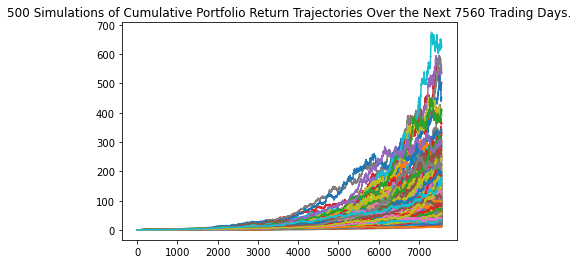

In [40]:
Monte_Carlo_30_line_plot = Monte_Carlo_30.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

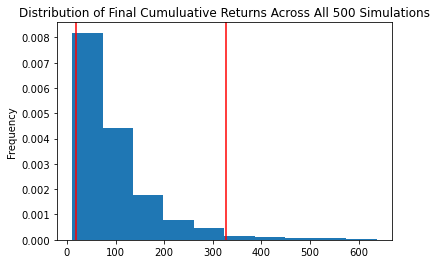

In [41]:
Monte_Carlo_30_distribution_plot = Monte_Carlo_30.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [42]:
Monte_Carlo_30_table = Monte_Carlo_30.summarize_cumulative_return()
Monte_Carlo_30_table

count           500.000000
mean             99.205261
std              84.335795
min              10.918075
25%              45.605380
50%              71.868417
75%             117.687169
max             636.485947
95% CI Lower     18.383005
95% CI Upper    326.078373
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [43]:
print(f"Current Value of Stock & Bond Portfolio: ${total_stocks_bonds:,.2f}")

Current Value of Stock & Bond Portfolio: $75,055.90


In [44]:
ci_lower_thirty_cumulative_return = Monte_Carlo_30_table[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = Monte_Carlo_30_table[9] * total_stocks_bonds

print(f"There is a 95% chance that the value of the Stocks and Bonds Portfolio, currently worth ${total_stocks_bonds:,.2f}, "
      f"will be valued between ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f} within 30 years.")

There is a 95% chance that the value of the Stocks and Bonds Portfolio, currently worth $75,055.90, will be valued between $1,379,752.95 and $24,474,105.74 within 30 years.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [45]:
Monte_Carlo_10 = MCSimulation(
    portfolio_data=prices_df,
    weights=[0.2, 0.8],
    num_simulation=500,
    num_trading_days=252*10
)

Monte_Carlo_10.portfolio_data.head()

AGG                                                        SPY  \
              open     high       low    close    volume daily_return    open   
2018-12-31  106.12  106.510  105.6200  106.495   8349838          NaN  249.56   
2019-01-02  106.55  106.610  106.4701  106.585  10164756     0.000845  245.98   
2019-01-03  106.57  107.075  106.5700  107.020   6260265     0.004081  248.23   
2019-01-04  106.66  106.720  106.5500  106.695   7755476    -0.003037  247.59   
2019-01-07  106.72  106.790  106.4600  106.470   6545877    -0.002109  252.69   

                                                            
              high     low   close     volume daily_return  
2018-12-31  250.16  247.47  248.55  100767777          NaN  
2019-01-02  251.21  245.95  249.89  107236613     0.005391  
2019-01-03  248.57  244.03  244.46  113782919    -0.021730  
2019-01-04  253.11  247.17  252.41  122528832     0.032521  
2019-01-07  255.95  251.69  254.40   88317608     0.007884

In [46]:
Monte_Carlo_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996922,1.020603,0.990131,1.009649,0.998263,0.985576,1.010078,0.982079,1.018840,0.994786,...,0.994264,1.003989,1.016932,0.991273,0.997489,0.998509,1.009008,1.008160,1.007674,0.989696
2,1.003176,0.994799,0.992255,1.011484,1.003326,0.993851,1.020246,0.986659,1.030508,1.009638,...,1.002772,1.007721,0.999400,0.988211,0.981931,0.995608,1.012961,0.996940,1.017306,0.980578
3,0.992205,0.991346,0.980973,1.017365,0.998558,0.971512,1.037629,0.991985,1.025330,1.006942,...,0.994704,1.004729,1.000812,1.000345,0.980681,0.993646,1.016304,1.017332,1.020668,0.974759
4,0.993096,1.017033,0.976002,1.005283,1.002666,0.969335,1.043937,1.001240,1.032189,1.004952,...,0.999213,1.001794,0.991700,1.010927,0.985416,0.991818,1.002883,1.035001,1.024044,0.987638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.942544,4.505026,4.205258,1.442530,6.428139,3.709060,4.521437,5.441984,11.406784,4.367282,...,10.559422,2.944950,8.144791,7.391649,7.877004,4.056552,3.883470,5.397017,2.581353,2.679047
2517,2.991025,4.444205,4.125016,1.453484,6.494842,3.817617,4.402382,5.429721,11.517164,4.426458,...,10.699021,2.950277,8.145228,7.418576,7.782412,4.103634,3.925377,5.393178,2.545530,2.691608
2518,2.991331,4.463085,4.182612,1.466665,6.543583,3.802643,4.383505,5.485820,11.451759,4.501670,...,10.768192,2.968258,8.257761,7.382622,7.851740,4.108812,3.949140,5.408706,2.574152,2.695872
2519,2.980607,4.517354,4.128065,1.482098,6.579849,3.867432,4.362581,5.477248,11.445164,4.460294,...,10.688831,2.970135,8.368157,7.489187,7.702311,4.132615,3.970881,5.364921,2.622606,2.742182


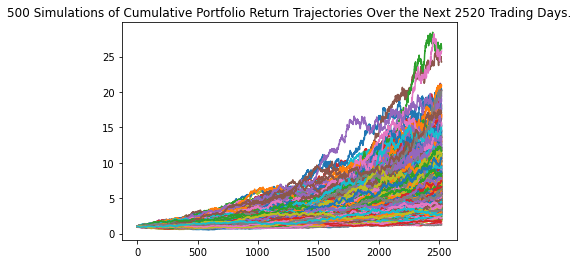

In [47]:
Monte_Carlo_10_line_plot = Monte_Carlo_10.plot_simulation()

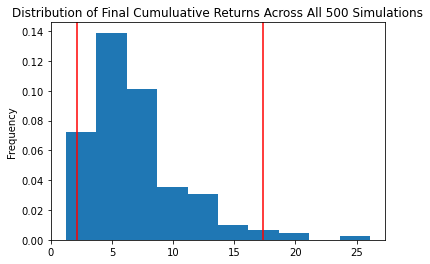

In [48]:
Monte_Carlo_10_dist_plot = Monte_Carlo_10.plot_distribution()

In [49]:
Monte_Carlo_10_table = Monte_Carlo_10.summarize_cumulative_return()
Monte_Carlo_10_table

count           500.000000
mean              6.897499
std               3.885276
min               1.223898
25%               4.179444
50%               5.941166
75%               8.424956
max              26.106501
95% CI Lower      2.168149
95% CI Upper     17.318318
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [50]:
print(f"Stock & Bond Portfolio Current Value: ${total_stocks_bonds:,.2f}")

Stock & Bond Portfolio Current Value: $75,055.90


In [51]:
ci_lower_ten_cumulative_return = Monte_Carlo_10_table[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = Monte_Carlo_10_table[9] * total_stocks_bonds

print(f"There is a 95% chance that the value of the stocks and bonds portfolio, currently worth ${total_stocks_bonds:,.2f}, "
      f"will be valued between ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f} within ten years.")


There is a 95% chance that the value of the stocks and bonds portfolio, currently worth $75,055.90, will be valued between $162,732.39 and $1,299,841.96 within ten years.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

## Answer:

#### Technically, the extreme high-end of the 10-year analysis barely surpasses the low end of the 30-year analysis, therefore there isn't much justification for retiring after only 10 years. Unfortunately, we do not know the yearly expenses of the family in question, therefore we cannot say for sure what value is required for a safe retirement to begin with. According to the IRS, the current yearly expense of a family of 4 living in Chicago is just over $88,000. Using this value as a benchmark, retiring after only 10 years would be a risky decision. A period of 30 years would allow for a less aggressive investing strategy along with a substantially higher low-end figure. 